In [1]:
import numpy as np
import pandas as pd
import IPython.display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/finn/visual_Studio_Code/data/All results.csv')
display(df)

,date,target,type,filter,exptimes,#images,Mean value (mean stacked),Std (mean stacked),Mean value (median stacked),Std (median stacked)
0,4.09,HIP100587,ls,B,"30.0,0.5",50,-9.30455,0.0094,-9.30123,0.01072
1,5.09,HIP75458,ls,H-alpha,"40.0,0.35",50,-10.46126,0.0112,-10.44900,0.01944
2,11.09,HIP100587,ls,B,"40.0,2.0",45,-8.76337,0.0211,-8.82561,0.02656
3,11.09,HIP100587,df,B,1,50,5.89690,0.0382,5.91490,0.05070
4,11.09,HIP100587,df,B,2,50,6.94100,0.0336,6.97650,0.03610
5,11.09,HIP100587,df,B,4,50,7.60610,0.0124,7.64390,0.01900
6,11.09,HIP100587,df,R,0.5,100,-8.16710,0.0280,-8.26900,0.02300
7,25.09,HIP100587,ls,B,"40.0,0.7",70,-9.10102,0.0108,-9.09742,0.00635
8,26.09,HIP100587,df,B,4,200,-8.77020,0.0073,-8.75960,0.00720
9,26.09,HIP100587,df,R,1.5,250,-8.89370,0.0073,-8.88340,0.00780


In [3]:
print(df[(df['type'] == 'df') & (df['target']=='HIP100587')]['exptimes'])

3       1
4       2
5       4
6     0.5
8       4
9     1.5
24      5
26      7
31      8
Name: exptimes, dtype: object


In [4]:
df['Std (mean stacked) per 10 images'] = df['Std (mean stacked)'] * np.sqrt(df['#images']/10) 
df['Std (median stacked) per 10 images'] = df['Std (median stacked)'] * np.sqrt(df['#images']/10) 
display(df.head())

,date,target,type,filter,exptimes,#images,Mean value (mean stacked),Std (mean stacked),Mean value (median stacked),Std (median stacked),Std (mean stacked) per 10 images,Std (median stacked) per 10 images
0,4.09,HIP100587,ls,B,"30.0,0.5",50,-9.30455,0.0094,-9.30123,0.01072,0.021019,0.023971
1,5.09,HIP75458,ls,H-alpha,"40.0,0.35",50,-10.46126,0.0112,-10.44900,0.01944,0.025044,0.043469
2,11.09,HIP100587,ls,B,"40.0,2.0",45,-8.76337,0.0211,-8.82561,0.02656,0.044760,0.056342
3,11.09,HIP100587,df,B,1,50,5.89690,0.0382,5.91490,0.05070,0.085418,0.113369
4,11.09,HIP100587,df,B,2,50,6.94100,0.0336,6.97650,0.03610,0.075132,0.080722


In [5]:
def calculate_total_exptime(row):
    exptimes_split = row['exptimes'].split(',')
    if len(exptimes_split) == 2:
        return row['#images'] * (float(exptimes_split[0]) + float(exptimes_split[1])) / 60
    else:
        return row['#images'] * float(exptimes_split[0]) / 60

# Apply the function to create the 'total exptime' column
df['total exptime'] = df.apply(calculate_total_exptime, axis=1)

def calculate_total_exptime_with_download(row): # download time was 6s
    exptimes_split = row['exptimes'].split(',')
    if len(exptimes_split) == 2: # for ls series
        return row['#images'] * (float(exptimes_split[0]) + float(exptimes_split[1]) + 6) / 60
    else:
        return row['#images'] * (float(exptimes_split[0]) +6) / 60

df['total exptime with download'] = df.apply(calculate_total_exptime_with_download, axis=1)

display(df.head())

df['Std (mean stacked) per 10min exptime (with download)']   = df['Std (mean stacked)'] * np.sqrt(df['total exptime with download']/10) 
df['Std (median stacked) per 10min exptime (with download)'] = df['Std (median stacked)'] * np.sqrt(df['total exptime with download']/10) 

df['Std (mean stacked) per 10min exptime']                   = df['Std (mean stacked)'] * np.sqrt(df['total exptime']/10) 
df['Std (median stacked) per 10min exptime']                 = df['Std (median stacked)'] * np.sqrt(df['total exptime']/10) 

'''df['Std (mean stacked) per 10min exptime (with download)']   = df['Std (mean stacked)'] * (df['total exptime with download']/10) 
df['Std (median stacked) per 10min exptime (with download)'] = df['Std (median stacked)'] * (df['total exptime with download']/10) 

df['Std (mean stacked) per 10min exptime']                   = df['Std (mean stacked)'] * (df['total exptime']/10) 
df['Std (median stacked) per 10min exptime']                 = df['Std (median stacked)'] * (df['total exptime']/10)''' 

display(df.head())

,date,target,type,filter,exptimes,#images,Mean value (mean stacked),Std (mean stacked),Mean value (median stacked),Std (median stacked),Std (mean stacked) per 10 images,Std (median stacked) per 10 images,total exptime,total exptime with download
0,4.09,HIP100587,ls,B,"30.0,0.5",50,-9.30455,0.0094,-9.30123,0.01072,0.021019,0.023971,25.416667,30.416667
1,5.09,HIP75458,ls,H-alpha,"40.0,0.35",50,-10.46126,0.0112,-10.44900,0.01944,0.025044,0.043469,33.625000,38.625000
2,11.09,HIP100587,ls,B,"40.0,2.0",45,-8.76337,0.0211,-8.82561,0.02656,0.044760,0.056342,31.500000,36.000000
3,11.09,HIP100587,df,B,1,50,5.89690,0.0382,5.91490,0.05070,0.085418,0.113369,0.833333,5.833333
4,11.09,HIP100587,df,B,2,50,6.94100,0.0336,6.97650,0.03610,0.075132,0.080722,1.666667,6.666667


,date,target,type,filter,exptimes,#images,Mean value (mean stacked),Std (mean stacked),Mean value (median stacked),Std (median stacked),Std (mean stacked) per 10 images,Std (median stacked) per 10 images,total exptime,total exptime with download,Std (mean stacked) per 10min exptime (with download),Std (median stacked) per 10min exptime (with download),Std (mean stacked) per 10min exptime,Std (median stacked) per 10min exptime
0,4.09,HIP100587,ls,B,"30.0,0.5",50,-9.30455,0.0094,-9.30123,0.01072,0.021019,0.023971,25.416667,30.416667,0.016394,0.018696,0.014986,0.017090
1,5.09,HIP75458,ls,H-alpha,"40.0,0.35",50,-10.46126,0.0112,-10.44900,0.01944,0.025044,0.043469,33.625000,38.625000,0.022012,0.038206,0.020538,0.035647
2,11.09,HIP100587,ls,B,"40.0,2.0",45,-8.76337,0.0211,-8.82561,0.02656,0.044760,0.056342,31.500000,36.000000,0.040034,0.050394,0.037449,0.047139
3,11.09,HIP100587,df,B,1,50,5.89690,0.0382,5.91490,0.05070,0.085418,0.113369,0.833333,5.833333,0.029176,0.038723,0.011027,0.014636
4,11.09,HIP100587,df,B,2,50,6.94100,0.0336,6.97650,0.03610,0.075132,0.080722,1.666667,6.666667,0.027434,0.029476,0.013717,0.014738


In [13]:
print(df[(df['type'] == 'df') & (df['target']=='HIP100587')]['total exptime with download'].mean())
print(df[(df['type'] == 'ls') & (df['target']=='HIP100587')]['total exptime with download'].mean())

18.94259259259259
35.723333333333336


In [8]:
mean_mean_st = df['Std (mean stacked)'].mean()
mean_median_st = df['Std (median stacked)'].mean()
median_mean_st = df['Std (mean stacked)'].median()
median_median_st = df['Std (median stacked)'].median()
print(mean_mean_st, mean_median_st)
print(median_mean_st, median_median_st)

0.013044117647058826 0.014068529411764707
0.011 0.01274


In [5]:
df['type'] = df['type'].replace({'ls': 'LS', 'df':'DF', 'ms' :'mesh'})
display(df.head())

,date,target,type,filter,exptimes,#images,Mean value (mean stacked),Std (mean stacked),Mean value (median stacked),Std (median stacked),Std (mean stacked) per 10 images,Std (median stacked) per 10 images,total exptime,total exptime with download,Std (mean stacked) per 10min exptime (with download),Std (median stacked) per 10min exptime (with download),Std (mean stacked) per 10min exptime,Std (median stacked) per 10min exptime
0,4.09,HIP100587,LS,B,"30.0,0.5",50,-9.30455,0.0094,-9.30123,0.01072,0.021019,0.023971,25.416667,30.416667,0.028592,0.032607,0.023892,0.027247
1,5.09,HIP75458,LS,H-alpha,"40.0,0.35",50,-10.46126,0.0112,-10.44900,0.01944,0.025044,0.043469,33.625000,38.625000,0.043260,0.075087,0.037660,0.065367
2,11.09,HIP100587,LS,B,"40.0,2.0",45,-8.76337,0.0211,-8.82561,0.02656,0.044760,0.056342,31.500000,36.000000,0.075960,0.095616,0.066465,0.083664
3,11.09,HIP100587,DF,B,1,50,5.89690,0.0382,5.91490,0.05070,0.085418,0.113369,0.833333,5.833333,0.022283,0.029575,0.003183,0.004225
4,11.09,HIP100587,DF,B,2,50,6.94100,0.0336,6.97650,0.03610,0.075132,0.080722,1.666667,6.666667,0.022400,0.024067,0.005600,0.006017


In [14]:
y1 = ['Std (mean stacked)','Std (median stacked)']
y2 = ['Std (mean stacked) per 10 images', 'Std (median stacked) per 10 images']
y3 = ['Std (mean stacked) per 10min exptime', 'Std (median stacked) per 10min exptime' ]
y4 = ['Std (mean stacked) per 10min exptime (with download)', 'Std (median stacked) per 10min exptime (with download)']
y_list = [y1,y2,y3,y4]

def strip_plt(y):
        fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
        for i in range (len(y)):
                sns.stripplot(x='target', y=y[i], data=df, hue='type', dodge=True, ax= ax[i])
                ax[i].set_ylabel(r'$\sigma$ [mag]')
                #ax[i].set_title(y[i])
                #y_ticks = np.arange(round(ax[i].get_ylim()[0], 3), round(ax[i].get_ylim()[1],3), 0.005)
                #ax[i].set_yticks(y_ticks)
        plt.tight_layout()
        plt.show()


#for k, y in enumerate (y_list):
    #strip_plt(y)

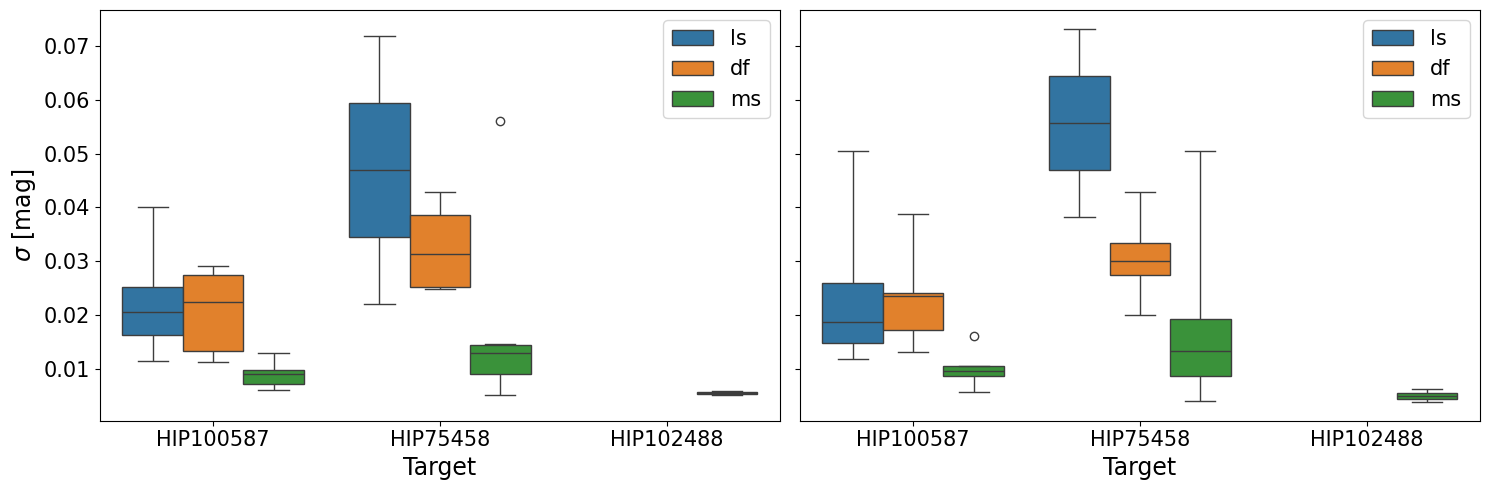

In [16]:
fs = 15 #fontsize
fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
for i in range(2):
    sns.boxplot(x='target', y=y4[i], hue='type', data = df, ax=ax[i], whis=3)
    ax[i].set_xlabel('Target', fontsize=fs+2)
    ax[i].tick_params(axis='both', which='both', labelsize=fs)
    ax[i].legend(fontsize=fs)
ax[0].set_ylabel(r'$\sigma$ [mag]', fontsize=fs+2)


plt.tight_layout()
#plt.savefig(f'/home/finn/Pictures/Results Time Series Final/single_nights_boxplot_scaled.png')
plt.show()

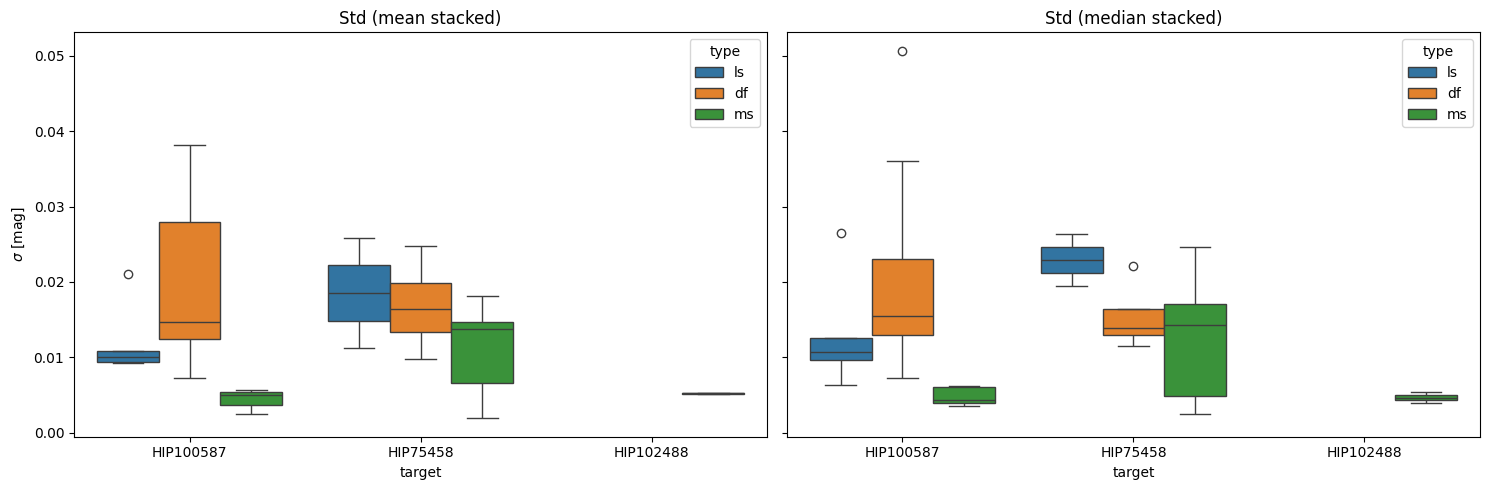

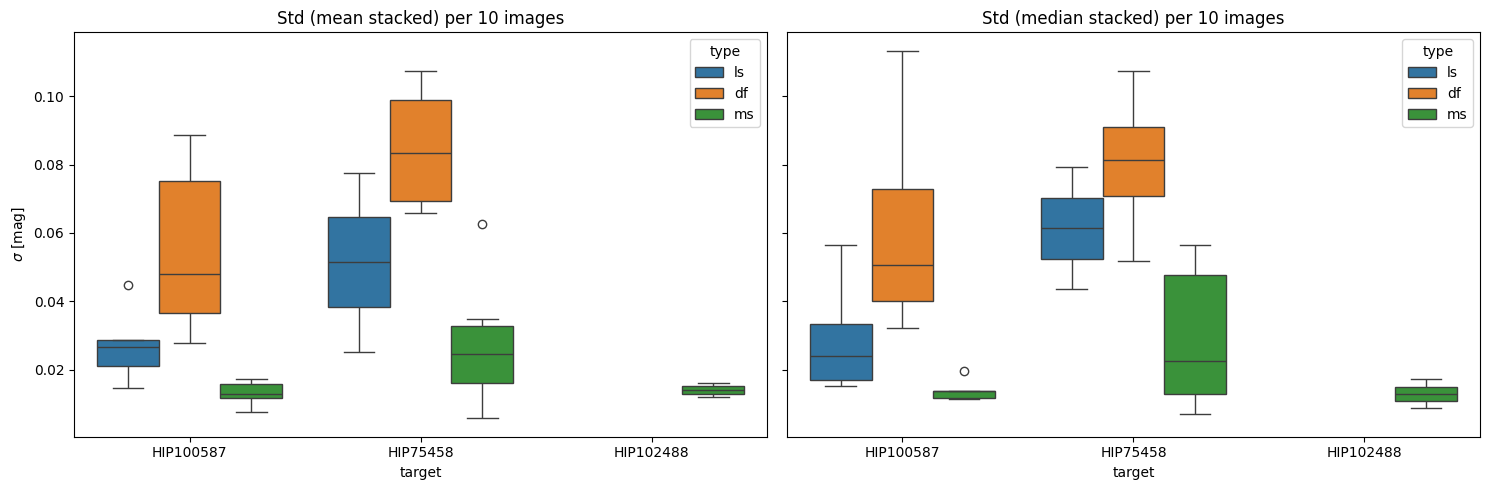

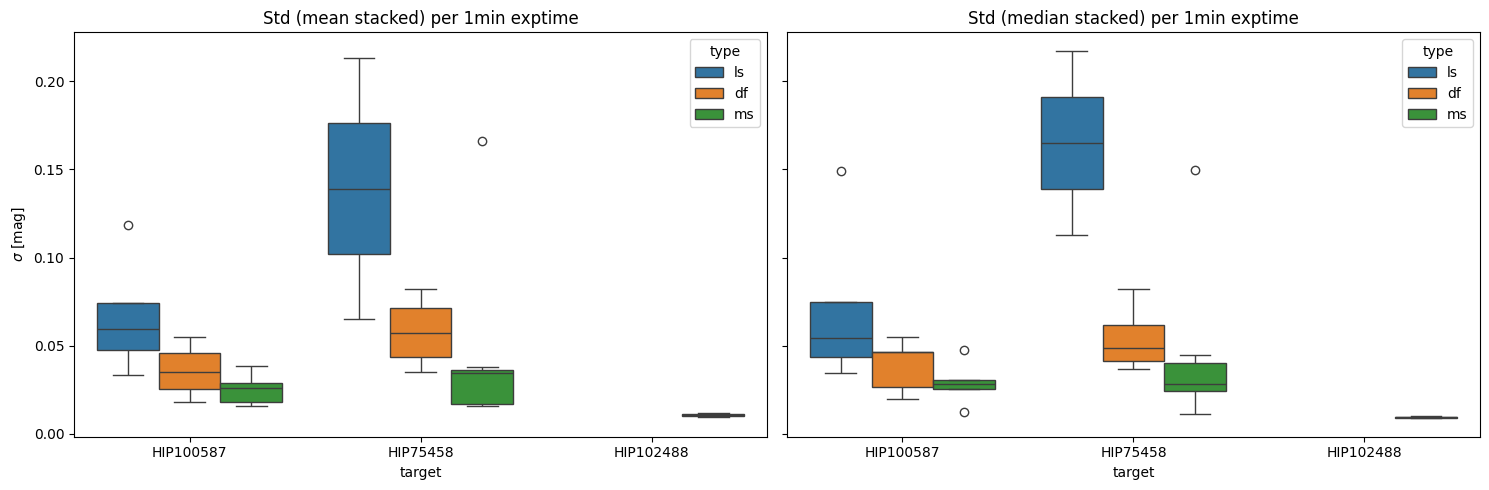

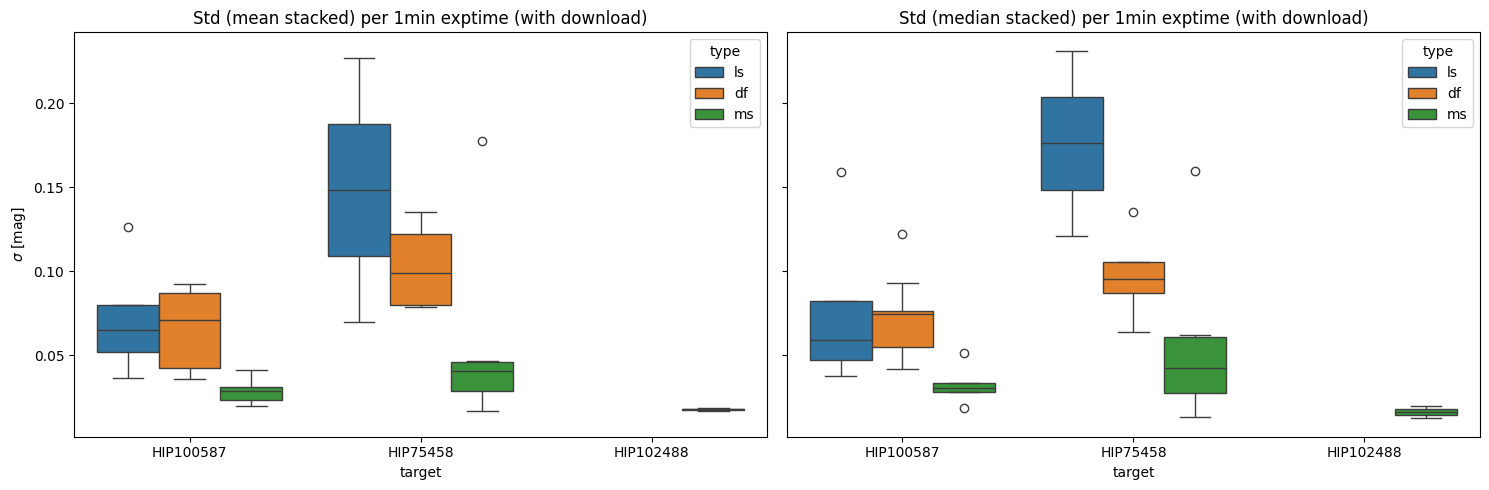

In [14]:
def box_plot(y):
        fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
        for i in range (len(y)):
                sns.boxplot(x='target', y=y[i], hue='type', data = df, ax=ax[i], whis=1.5)
                ax[i].set_ylabel(r'$\sigma$ [mag]')
                ax[i].set_title(y[i])
        plt.tight_layout()
        plt.savefig(f'/home/finn/Downloads/plot{k+len(y_list)}.png')
        plt.show()


for k, y in enumerate (y_list):
    box_plot(y)

In [ ]:
# line in middle of box is median, upper and lower line is greatest and smalles value. Box is between first Quartile (Q1), i.e. 25% of data and Q3 i.e. 75% of data, points outside are outliers


In [72]:
#sns.pairplot(df, hue='Type')